In [1535]:
# importing necessary libraries

In [1536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Analysis on Problem 1: Linear Regression

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [1537]:
data= pd.read_csv('Downloads/cubic_zirconia.csv')

In [1538]:
# top 5 values
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1539]:
# last 5 values
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [1540]:
#shape of the data
data.shape

(26967, 11)

There are total 26967 rows and 11 Columns in the data.

In [1541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


we have multiple data types as 6 float data types, 2 integer data types and 3 object data types.

Coulumn  Unnamed: 0 contains serial number so we can remove it.

In [1542]:
data.drop('Unnamed: 0', axis=1 ,inplace=True)

In [1543]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [1544]:
data.duplicated().sum()

34

34 duplicate entry found in the data and will remove these values.

In [1545]:
data.drop_duplicates(inplace=True)

In [1546]:
data.duplicated().sum()

0

All duplicate values are removed from data

In [1547]:
data.shape

(26933, 10)

In [1548]:
# checking for missing values
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are missing values present in the data but it's only in column 'depth' and we will impute this in question 1.2

In [1549]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


there is no anomalies found in data.

## Data Visualization

### Univariate Analysis

#### Non visual representation

Using describe function to get descripitve anylysis.

In [1550]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26236.0,NaN,NaN,NaN,61.745285,1.412243,50.8,61.0,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.733102,1.165037,0.0,4.71,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.537769,0.719964,0.0,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


Insights:

Maximum price of zirconia is 18818.0 and mimimum price is 326.0 so we can say that price spread in wide range.

minimum Carat weight of zirconia is 0.2 and maximum is 4.5 so zirconia is available in different carat weight .

Cut quality of zirconia is mostly marked as Ideal which is the highest qality.

Most of zirconia marked with clarity as SI1 which is decent .

#### Visual representation:

We will use Boxplot and histogram to see distribution and pattern of continuous varibales.

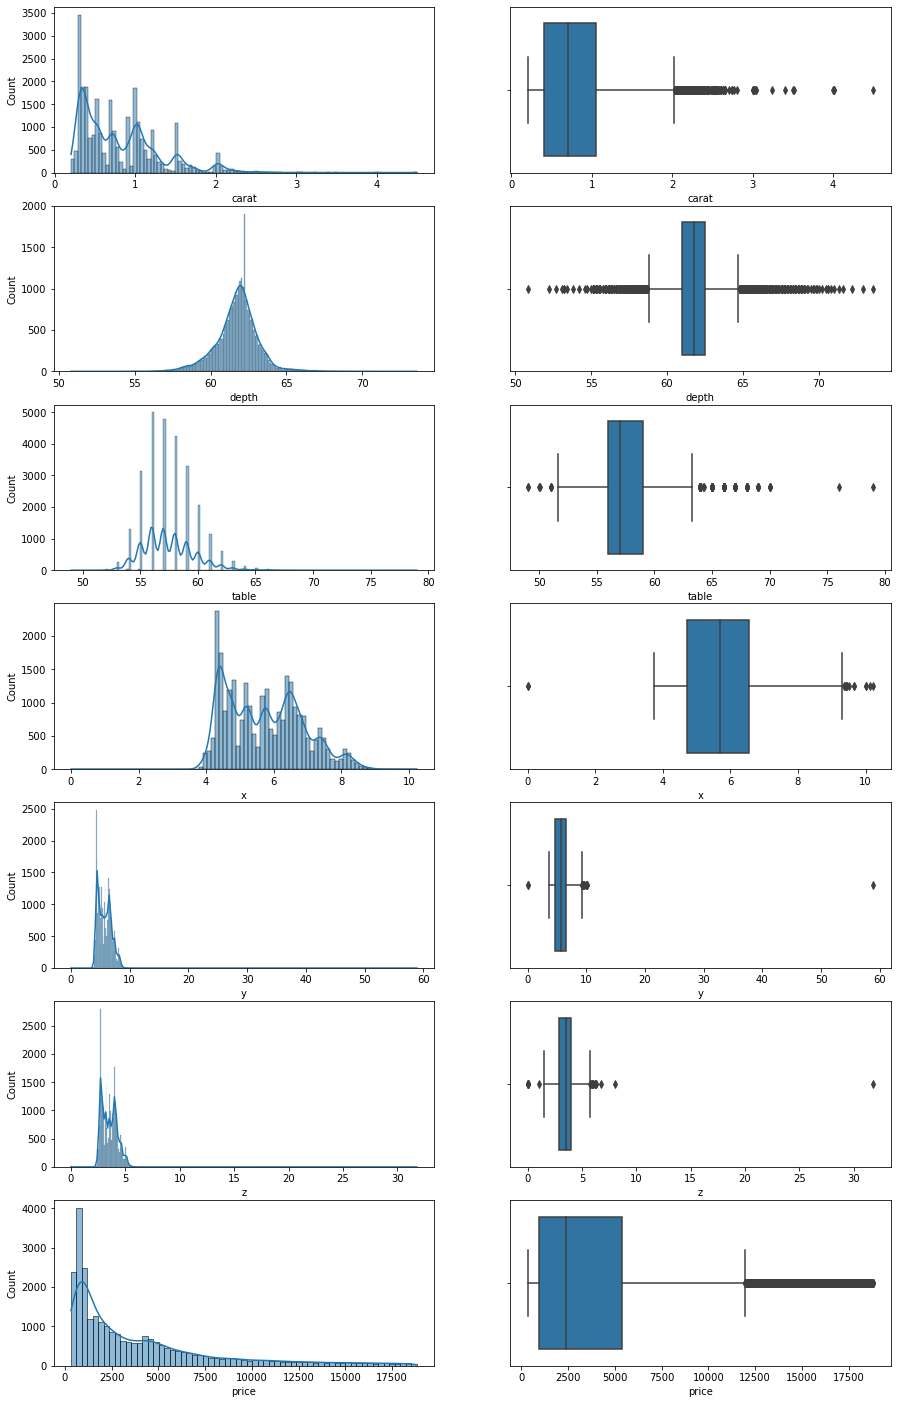

In [1551]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,25)
sns.histplot(data['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x='carat', data=data, ax=axes[0][1])
sns.histplot(data['depth'] , kde=True, ax=axes[1][0])
sns.boxplot(x='depth', data=data , ax=axes[1][1])
sns.histplot(data['table'] , kde=True, ax=axes[2][0])
sns.boxplot(x='table', data=data , ax=axes[2][1])
sns.histplot(data['x'] , kde=True, ax=axes[3][0])
sns.boxplot(x='x', data=data , ax=axes[3][1])
sns.histplot(data['y'] , kde=True, ax=axes[4][0])
sns.boxplot(x='y', data=data , ax=axes[4][1])
sns.histplot(data['z'] , kde=True, ax=axes[5][0])
sns.boxplot(x='z', data=data , ax=axes[5][1])
sns.histplot(data['price'] , kde=True, ax=axes[6][0])
sns.boxplot(x='price', data=data , ax=axes[6][1])
plt.show()

Insights:

From the above box plots we can say that there are ouliers present in the data.

For the variable 'depth' distribution is almost symetric .

#### For Categorical variable we are using barplot.

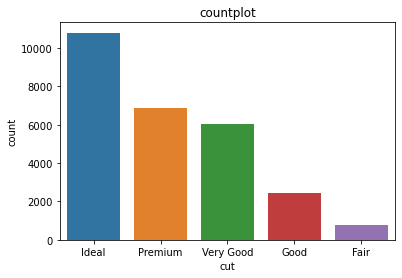

In [1552]:
sns.countplot(x='cut', data=data)
plt.title('countplot');

Best cut quality of zirconia is 'Ideal and it holds maximum number of cubic other side  'Fair' is poor cut quality.

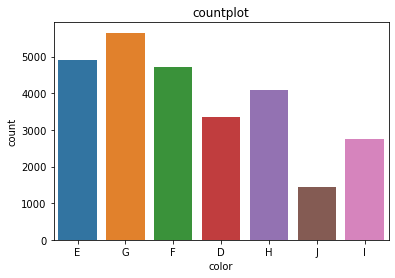

In [1553]:
sns.countplot(x='color', data=data)
plt.title('countplot');

Most of the zirconia has color 'G' and color 'J' given to the least number of zirconia which is right because color 'J' is the worst color

Here count of zirconia having color 'D' requires improvement.

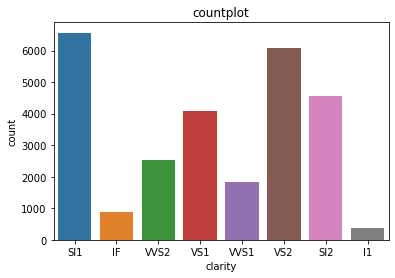

In [1554]:
sns.countplot(x='clarity', data=data)
plt.title('countplot');

Clarity  'l1' has the minimum count and it also the worst clarity in the data where the other side Clarity 'Sl1' has the maximum count and it's a decent clarity.

Best clarity is 'IF' but it has very less count whereas it must have maximum or close to maximum count to maintain good clarity of zirconia.

### Bivariate Analysis 

We will use countplot, boxplot and scatterplot to compare 2 variables .

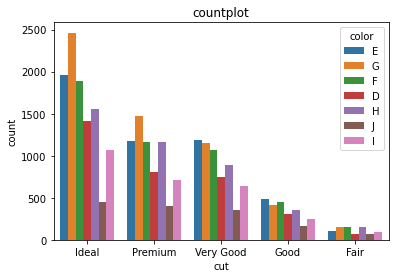

In [1555]:
sns.countplot(data = data, x ='cut',hue ='color')
plt.title('countplot');

Mostly color G given into the all cut quality of zirconia.

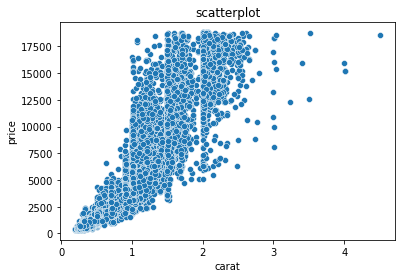

In [1556]:
sns.scatterplot(data = data, x ='carat',y ='price')
plt.title('scatterplot');

we can see that 'Carat' is potiviely correlated with 'price'.

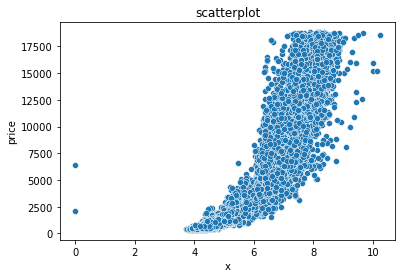

In [1557]:
sns.scatterplot(data = data, x ='x',y ='price')
plt.title('scatterplot');

we can see that x(Length of the cubic zirconia) is potiviely correlated with price.

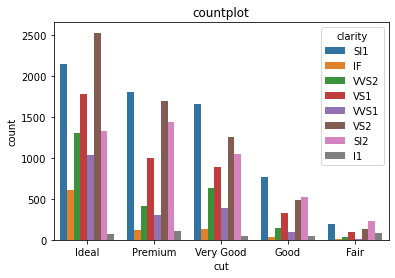

In [1558]:
sns.countplot(data = data, x ='cut',hue ='clarity')
plt.title('countplot');

In Cut quality 'Fair' very few zirconia found with best Clarity 'IF' so this quality lacks top Clarity zirconia.

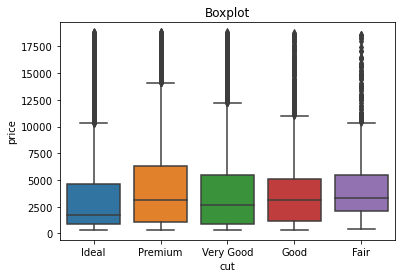

In [1559]:
sns.boxplot(x='cut', y='price', data=data)
plt.title('Boxplot');

The zirconia diamonds with 'Premium' Cut are the most Expensive.

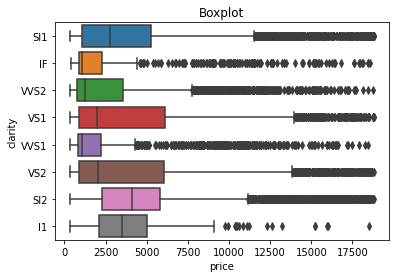

In [1560]:
sns.boxplot(data=data, x='price', y='clarity')
plt.title('Boxplot');

Most expensiv diamond belongs to 'Clarity' S1 .

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [1561]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

we can see that there is missing values in the column 'depth' and outliers also present in this variable so will replace null values with median .

In [1562]:
data['depth'].median()

61.8

In [1563]:
data['depth']= data['depth'].fillna(data['depth'].median())

In [1564]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### unique values for categorical variables

In [1565]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




unique values looks fine

#### Checking Values equal to 0

In [1566]:
(data['x']==0).sum()

2

In [1567]:
(data['y']==0).sum()

2

In [1568]:
(data['z']==0).sum()

8

From descriptive summary We have seen that value equal to zero is only in columns 'x', 'y', 'z' so what these variables are ? these variables indicate the dimension of a diamond and any of the parameters (Length, Width, Height) which shows the dimension can not be zero and number of obersrvation containing value=0 are very less so we will remove these. 

In [1569]:
data=data.drop(data[data['x']==0].index).reset_index(drop= True)

In [1570]:
data=data.drop(data[data['y']==0].index).reset_index(drop= True)

In [1571]:
data=data.drop(data[data['z']==0].index).reset_index(drop= True)

In [1572]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### combining ordinal variable

All 3 categorical variabls are ordinal as these follows a order like worst to best OR best to worst.

In [1573]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




Combining odrdinal veriable in a way which gives us minimum nuber of groups

In veriable 'CUT' we have 5 groups and we can separate these groups in 3 groups like average, good, best where Fair will be the part of group 'average' and good, Very Good in group 'good' and rest in group 'best' .

In variable 'color'  D is the best color and J is the worst color and other color falls between these 2 which we can say in a alphabetic order best to workst like- D,E,F,G,H,I,J 

we can seprate these in 4 group where J will be in group 'poor' & H,I in group 'average' .

F,G in group 'good' and rest in group 'best'.

In variable 'CLARITY' IF is the best and l1 is the worst so we can combine IF, VVS1 in group 'best' and VS2, Sl1, Sl2 in grpup 'average' and VVS2, VS1 in group 'Good' rest in group 'Worst'

In [1574]:
data['cut']=np.where(data['cut'] =='Ideal', 'Best', data['cut'])
data['cut']=np.where(data['cut'] =='Very Good', 'Good', data['cut'])
data['cut']=np.where(data['cut'] =='Fair', 'Average', data['cut'])
data['cut']=np.where(data['cut'] =='Premium', 'Best', data['cut'])

In [1575]:
data['cut'].value_counts()

Best       17685
Good        8461
Average      779
Name: cut, dtype: int64

In [1576]:
data['color']=np.where(data['color'] =='J', 'Poor', data['color'])
data['color']=np.where(data['color'] =='H', 'Average', data['color'])
data['color']=np.where(data['color'] =='I', 'Average', data['color'])
data['color']=np.where(data['color'] =='F', 'Good', data['color'])
data['color']=np.where(data['color'] =='G', 'Good', data['color'])
data['color']=np.where(data['color'] =='D', 'Best', data['color'])
data['color']=np.where(data['color'] =='E', 'Best', data['color'])

In [1577]:
data['color'].value_counts()

Good       10372
Best        8257
Average     6856
Poor        1440
Name: color, dtype: int64

In [1578]:
data['clarity']=np.where(data['clarity'] =='I1', 'Worst', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI1', 'Average', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS2', 'Average', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VS1', 'Good', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS2', 'Good', data['clarity'])
data['clarity']=np.where(data['clarity'] =='VVS1', 'Best', data['clarity'])
data['clarity']=np.where(data['clarity'] =='IF', 'Best', data['clarity'])
data['clarity']=np.where(data['clarity'] =='SI2', 'Average', data['clarity'])


In [1579]:
data['clarity'].value_counts()

Average    17217
Good        6616
Best        2730
Worst        362
Name: clarity, dtype: int64

We have combined the group of ordinal variables and these were in a order so we ranked them with new variable in orderd form.

In [1580]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### Encoding the categorical variable.

We will use lable encoding as our variable is in ordinal form .

In [1581]:
from sklearn.preprocessing import LabelEncoder

In [1582]:
LE = LabelEncoder()

In [1583]:
data['cut'] = LE.fit_transform(data['cut'])

In [1584]:
data['color'] = LE.fit_transform(data['color'])

In [1585]:
data['clarity'] = LE.fit_transform(data['clarity'])

In [1586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26925 entries, 0 to 26924
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int32  
 2   color    26925 non-null  int32  
 3   clarity  26925 non-null  int32  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 1.7 MB


### Train Test Split

In [1587]:
from sklearn.model_selection import train_test_split

In [1588]:
# Copy all the predictor variables into X dataframe
X = data.drop('price', axis=1)

# Copy target into the y dataframe. 
y = data.pop('price')

In [1589]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1590]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1591]:
for indx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[indx]))

The coefficient for carat is 11005.921547059015
The coefficient for cut is 58.1048980122618
The coefficient for color is 95.98651587888155
The coefficient for clarity is 289.1842209725049
The coefficient for depth is -197.39424122917015
The coefficient for table is -101.25030342033497
The coefficient for x is -1297.1955148649827
The coefficient for y is 7.3566647440026
The coefficient for z is -31.348666735059165


In [1592]:
print("The intercept for our model is {}".format(regression_model.intercept_))

The intercept for our model is 20283.187895261588


In [1593]:
 # R square on training data
regression_model.score(X_train, y_train)

0.8646606102865697

86% of the variation in the variable y is explained by the predictors in the model for train set.

In [1594]:
# R square on testing  data
regression_model.score(X_test, y_test)

0.8677285505530588

86% of the variation in the variable y is explained by the predictors in the model for test set.

In this regression model we can see the R-square value on Training and Test data is close to each other 

In [1595]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1474.507368277916

In [1596]:
#RMSE on testing  data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1473.1909463247393

Linear regression Performance using sklearn model:

intercept for the model= 20283.187895261588

R square on training data= 0.8646606102865697

R square on testing data= 0.8677285505530588

RMSE on Training data= 1474.507368277916

RMSE on Testing data= 1473.1909463247393

We can see that train and test score is close to each other so no overfitting found in the model.

### Linear Regression using statsmodels(OLS)

In [1597]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [1598]:
model1 = sm.OLS(y_train,X_train).fit()
model1

In [1599]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.337e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:24   Log-Likelihood:            -1.6425e+05
No. Observations:               18847   AIC:                         3.285e+05
Df Residuals:                   18837   BIC:                         3.286e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.028e+04    741.488     27.355      0.000    1.88e+04    2.17e+04
carat       1.101e+04    112.389     97.927      0.000    1.08e+04    1.12e+04
cut           58.1049     21.379      2.718      0.007      16.201     100.009
color         95.9865     12.071      7.952      0.000      72.326     119.647
clarity      289.1842     12.253     23.601      0.000     265.167     313.201
depth       -197.3942      8.846    -22.314      0.000    -214.733    -180.055
table       -101.2503      5.223    -19.387      0.000    -111.487     -91.014
x          -1297.1955     61.417    -21.121      0.000   -1417.579   -1176.812
y              7.3567     29.003      0.254      0.800     -49.492      64.205
z            -31.3487     50.621     -0.619      0.536    -130.571      67.874
==============================================================================
Omnibus:                     4376.971   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159274.110
Skew:                           0.385   Prob(JB):                         0.00
Kurtosis:                      17.221   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficients tell us how one unit change in X can affect y.

The sign of the coefficient indicates if the relationship is positive or negative.

In [1600]:
#Calculate MSE on train
predicted_train=model1.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [1601]:
#RMSE on train 
np.sqrt(mse)

1474.507368277916

In [1602]:
#Calculate MSE on test
y_pred = model1.predict(X_test)
mse1=metrics.mean_squared_error(y_test,y_pred)

In [1603]:
#RMSE on test
np.sqrt(mse1)

1473.1909463247373

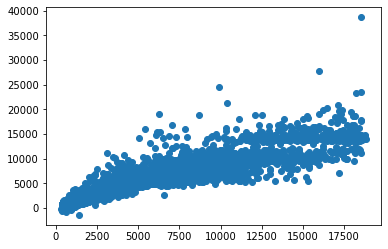

In [1604]:
plt.scatter(y_test, y_pred)
plt.show()

We can see that in both model and model1 performace score is similar.

### check for Multicollinearity

Multicollinearity is the presence of a strong correlation between the independent variables and We can check Multicollinearity with the VIF(Variance Inflation factor) score 

If VIF is 1 then no collinearities exist among the predictors and if VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it is signs of high multi-collinearity

In [1605]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const      4763.503431
carat        24.687104
cut           1.034921
color         1.006263
clarity       1.045658
depth         1.322249
table         1.179995
x            41.124845
y            10.133346
z            11.626518
dtype: float64



The VIF values indicate that the features carat, x, y, and z are correlated with one or more independent features.

To treat multicollinearity, we will have to drop one or more of the correlated features (carat, x, y, and z).

We will drop the variable that has the least impact on the adjusted R-squared of the model.

#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [1606]:
X_train2 = X_train.drop(["carat"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.796


On dropping 'carat', adj. R-squared decreased by 0.069

This sharp decline indicates that 'carat' is an important predictor and shouldn't be removed.

In [1607]:
X_train3 = X_train.drop(["x"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.861 
Adjusted R-squared: 0.861


On dropping 'x', adj. R-squared decresed by 0.004

In [1608]:
X_train4 = X_train.drop(["y"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.865 
Adjusted R-squared: 0.865


On dropping 'y', adj. R-squared remains the same.

In [1609]:
X_train5 = X_train.drop(["z"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.865 
Adjusted R-squared: 0.865


On dropping 'z', adj. R-squared remains the same.

#### Since there is no effect on adj. R-squared after dropping the 'z' column, we can remove it from the training set

In [1610]:
X_train = X_train.drop(["z"], axis=1)

In [1611]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -1.6425e+05
No. Observations:               18847   AIC:                         3.285e+05
Df Residuals:                   18838   BIC:                         3.286e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.039e+04    721.030     28.279      0.0

#### Let's check if multicollinearity is still present in the data.

In [1612]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const      4504.413857
carat        24.684807
cut           1.034003
color         1.006263
clarity       1.045434
depth         1.176757
table         1.179393
x            33.008558
y             9.993276
dtype: float64



We know that 'carat' is an important predictor, so let's see the effect of dropping 'x' and 'y' now.

In [1613]:
X_train = X_train.drop(["y"], axis=1)

In [1614]:
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.719e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -1.6425e+05
No. Observations:               18847   AIC:                         3.285e+05
Df Residuals:                   18839   BIC:                         3.286e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.04e+04    720.082     28.326      0.0

#### Let's check if multicollinearity is still present in the data.

In [1615]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const      4492.811840
carat        24.664744
cut           1.031545
color         1.006222
clarity       1.045434
depth         1.174806
table         1.177644
x            24.790501
dtype: float64



Multicollinearity is still present in our data so we should drop the 'x' column as well.

In [1616]:
X_train = X_train.drop(["x"], axis=1)

In [1617]:
olsmod_7 = sm.OLS(y_train, X_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 1.917e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:18:25   Log-Likelihood:            -1.6462e+05
No. Observations:               18847   AIC:                         3.293e+05
Df Residuals:                   18840   BIC:                         3.293e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.211e+04    666.771     18.169      0.0

#### Let's check if multicollinearity is still present in the data.

In [1618]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const      3704.195228
carat         1.071709
cut           1.031114
color         1.005016
clarity       1.034301
depth         1.109705
table         1.177175
dtype: float64



Now VIF for all the features is <2

#### After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.865 to 0.859). This shows that these variables did not have much predictive power.

In [1619]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_7.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_7.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4065,6096.132474,-2031.132474
1,5166,5275.300880,-109.300880
2,1708,2392.136281,-684.136281
3,2447,3549.849178,-1102.849178
4,6618,5799.735698,818.264302


In [1620]:
X_train.columns

Index(['const', 'carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [1621]:
X_test.columns

Index(['const', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [1622]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ['x', 'y',
       'z'], axis=1
)

In [1623]:
# let's make predictions on the test set
y_pred = olsres_7.predict(X_test2)

In [1624]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

1503.7314672115162

In [1625]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

1502.3943677899188

In [1626]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

969.7017949771334

In [1627]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

968.1593605559741

We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.

RMSE for training set:1503.7314672115162

RMSE for testing set:1502.3943677899188

R-squared : 0.859

Adj. R-squared: 0.859

In [1628]:
# Let us write the equation of linear regression
Equation = "price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_7.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_7.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_7.params[i], "* (", X_train.columns[i], ")")

price = 12114.40748719299 + 7989.560637532106 * ( carat ) +  69.88053100665627 * ( cut ) +  84.50288930241051 * ( color ) +  323.7819678919295 * ( clarity ) +  -145.38733694822466 * ( depth ) +  -104.07209352527796 * ( table )


We remove the multicolinarity from the data and we obtained suitable features for our model .

### The final Linear Regression equation is

Price = (12114.40748719299) * Intercept + (7989.560637532106) *  carat  +  (69.88053100665627) *  cut  +  (84.50288930241051) *  color  +  (323.7819678919295) *  clarity  +  (-145.38733694822466) *  depth  +  (-104.07209352527796) *  table 

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Insights:

We tried multiple models with different variable and at the end we got 6 independent variable which are important for our prediction.

1. When carat increases by 1 unit, diamond price increases by 7989.56 units, keeping all other predictors constant.

2. When cut increases by 1 unit, diamond price increases by 69.88 units, keeping all other predictors constant.

3. When color increases by 1 unit, diamond price increases by 84.50 units, keeping all other predictors constant.

4. When clarity increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.


As per model these 4 variables are most important variable 'Carat', 'Cut', 'color','clarity' for predicting the diamond price.

We also have negative co-efficient values -145.38 for 'depth' & -104.07 for 'table' shows that these variables are inversely proportion to diamond price.

We prepare our model with in different steps which we listed below:

1. First we split the data in 30:70 where 70 % is for train and 30% is for test.

2. Then we build Linear regression model by using Sklearn library and calculate Rmse, R squared values.

3. we observed that Rsquare, RMSE was almost close for train and test data.

4. we then build regerssion model from statsmodels and check multicollinearity in the data and found multicollinearity in the data by using VIF.

5. we reduce the multicollinearity from the data by removing variables and kept an eye on Adj Rsquare. 

6. Finally we got important attributes to predict the dimond price.

We can see R-squared: and Adj. R-squared: 0.859 are same. The overall P value is less than alpha.

#### Recommendation :

1. The Gem Stones company should focus more on the features 'Carat', 'Cut', 'color','clarity' as these are most important for      predicting the price.


2. The zirconia diamonds with 'Premium' Cut are the most Expensive so need to check on sale of this diamond if it's good then it    great as it's expensive one.


3. 'Depth' has negative imapct on diamond price so this needs to be low as much as possible .


4. 'table' which shows Width of diamond needs to be minimum as it will reduce the price of diamond.


5.  'carat' is the most importand feature out of all features as it is highly related to price and higher the carat weight of a diamond will have higher price.


6.  The Diamond's with clarity 'VS1' &'VS2' are the most Expensive So these two category are very important also most expensive diamond is from clarity SI1 and this is the 3 most expensive diamond clarity after 'VS1' &'VS2'.

# Analysis on Problem 2: Logistic Regression and LDA

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1629]:
data1 = pd.read_csv('Downloads/Holiday_Package.csv')

In [1630]:
# top 5 values
data1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [1631]:
# last  5 values
data1.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [1632]:
data1.shape

(872, 8)

Coulumn Unnamed: 0 contains serial number so we can remove it.

In [1633]:
data1.drop('Unnamed: 0', axis=1 , inplace =True)

In [1634]:
data1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [1635]:
data1.shape

(872, 7)

In [1636]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


We have 2 object datatypes and rest is intiger datatypes.

data type looks good.

In [1637]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


Salary spread to the wide range.

maximum age is 62 and minimum is 20

In [1638]:
# checking duplicate entries
data1.duplicated().sum()

0

No duplicate value found

In [1639]:
#checking for missing values
data1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No missing value found.

#### unique counts of categorical variable

In [1640]:
data1['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [1641]:
data1['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

## Data Visualization

### Univariate Analysis

#### Non visual representation

Using describe function to get descripitve anylysis.

In [1642]:
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insights:

Maximum Salary of an employee is 236961.0 and mimimum is 1322.0 so we can say that Salary spread in wide range.

Mostly employee did not opt for Holliday_Package which is a concern.

75% of employee's age is less than or equal to 48 years.

#### Visual representation:

We will use Boxplot and histogram to see distribution and pattern of continuous varibales.

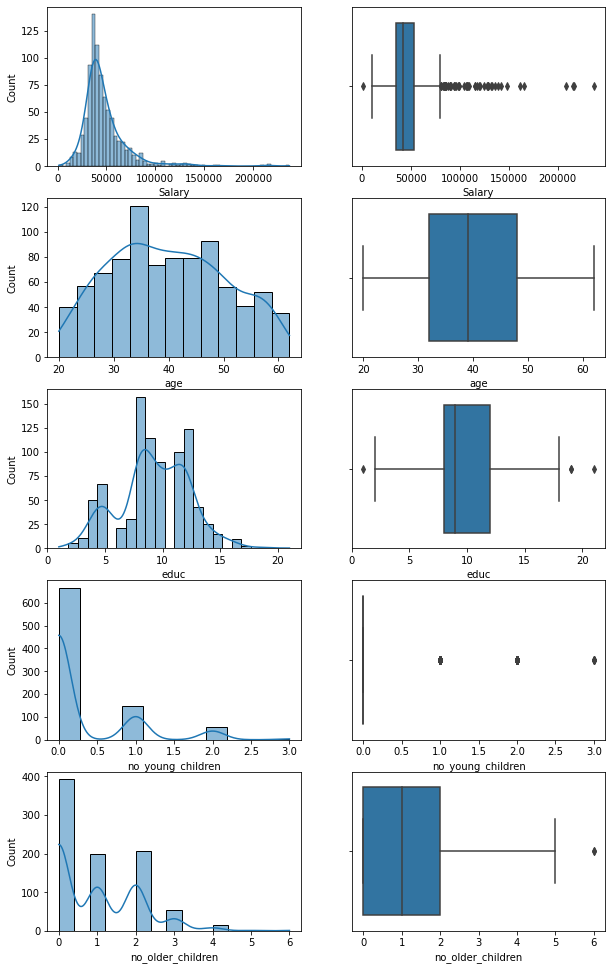

In [1643]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,17)
sns.histplot(data1['Salary'], kde=True, ax=axes[0][0])
sns.boxplot(x='Salary', data=data1, ax=axes[0][1])
sns.histplot(data1['age'] , kde=True, ax=axes[1][0])
sns.boxplot(x='age', data=data1 , ax=axes[1][1])
sns.histplot(data1['educ'] , kde=True, ax=axes[2][0])
sns.boxplot(x='educ', data=data1 , ax=axes[2][1])
sns.histplot(data1['no_young_children'] , kde=True, ax=axes[3][0])
sns.boxplot(x='no_young_children', data=data1 , ax=axes[3][1])
sns.histplot(data1['no_older_children'] , kde=True, ax=axes[4][0])
sns.boxplot(x='no_older_children', data=data1 , ax=axes[4][1])
plt.show()

Insights:

From the above box plots we can say that there are ouliers present in the data.

For the variable 'age' distribution is almost symetric .

#### For Categorical variable we are using barplot.

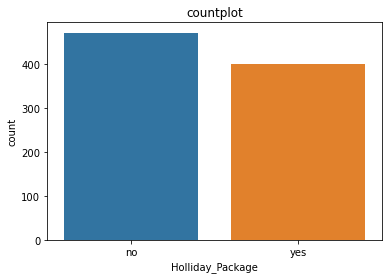

In [1644]:
sns.countplot(x='Holliday_Package', data=data1)
plt.title('countplot');

As we observed earlier number of Opted for 'Holliday_Package' is less than numbeer of not-Opted .

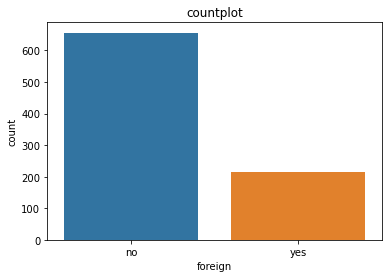

In [1645]:
sns.countplot(x='foreign', data=data1)
plt.title('countplot');

mostly non foreigner present in the data.

## Bivariate Analysis

We will use countplot, boxplot and scatterplot to compare 2 variables .

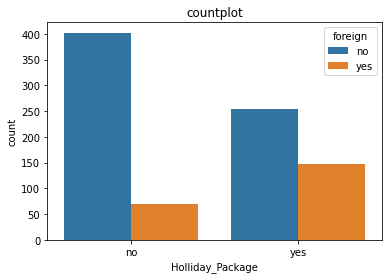

In [1646]:
sns.countplot(data = data1, x ='Holliday_Package',hue ='foreign')
plt.title('countplot');

We can say that number of foreigners who stand for yes highly opted for  Holliday_Package.

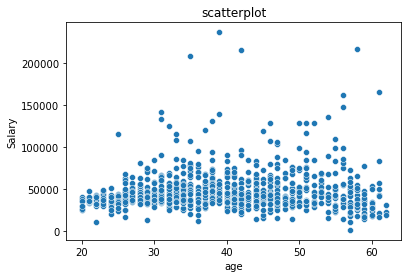

In [1647]:
sns.scatterplot(data = data1, y ='Salary',x ='age')
plt.title('scatterplot');

We found that age is not related to salary which is not common because generally salary and age are correlated.

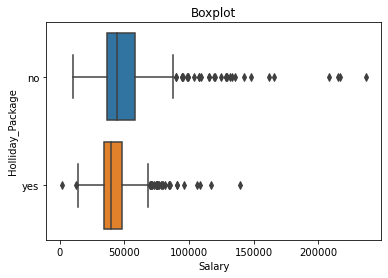

In [1648]:
sns.boxplot(data=data1, x='Salary', y='Holliday_Package')
plt.title('Boxplot');

We can see that those who have higher salary did not opted for Holliday_Package.

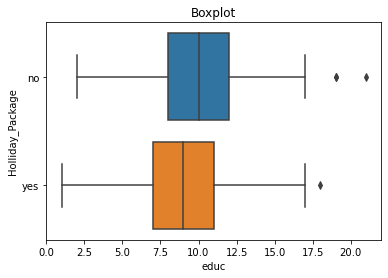

In [1649]:
sns.boxplot(data=data1, x='educ', y='Holliday_Package')
plt.title('Boxplot');

We can see that those who have high Years of formal education did not opted for Holliday_Package.

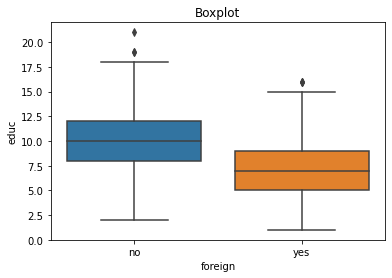

In [1650]:
sns.boxplot(data=data1, x='foreign', y='educ')
plt.title('Boxplot');

Mostly high Years of formal education is not foreigner .

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Encoding the data 

In [1651]:
data1_dummy = pd.get_dummies(data1,drop_first=True)
data1_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


### Train Test Split

In [1652]:
# Copy all the predictor variables into X dataframe
X = data1_dummy.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data1_dummy['Holliday_Package_yes']

In [1653]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=data1_dummy['Holliday_Package_yes'])

In [1654]:
y_train.value_counts(1)


0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [1655]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

## Building Logistic Regression model

In [1738]:
# Fit the Logistic Regression model
model1 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)
model1.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

### Predicting on Training and Test dataset

In [1739]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

### Getting the Predicted Classes and Probs

In [1740]:
ytrain_predict_prob=model1.predict_proba(X_train)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [1741]:
ytest_predict_prob=model1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


### Model Evaluation

In [1742]:
# Accuracy - Training Data
model1.score(X_train, y_train)

0.6672131147540984

In [1743]:
# Accuracy - Test Data
model1.score(X_test, y_test)

0.6526717557251909

### AUC and ROC for the training data

AUC: 0.735


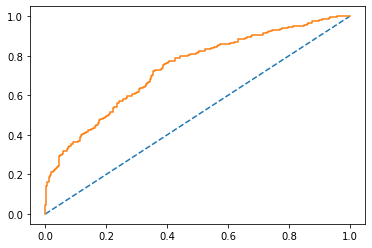

In [1744]:
# predict probabilities
probs = model1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the testing data

AUC: 0.735


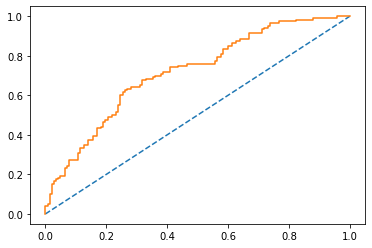

In [1745]:
# predict probabilities
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix & classification report for the training data

In [1746]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

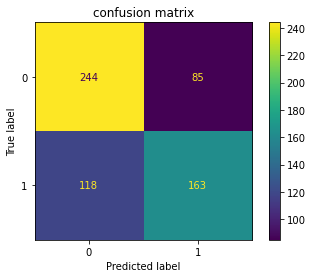

In [1747]:
plot_confusion_matrix(model1,X_train,y_train);
plt.title('confusion matrix');

In [1748]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Confusion Matrix & classification report for the test data

In [1749]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

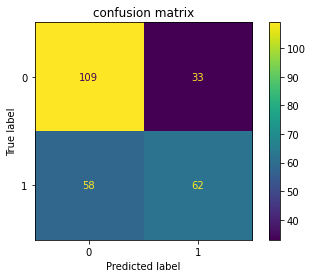

In [1750]:
plot_confusion_matrix(model1,X_test,y_test);
plt.title('confusion matrix');

In [1751]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



## Applying GridSearchCV for Logistic Regression

In [1806]:
grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','liblinear','newton-cg'],
      'tol':[0.0001,0.00001]}

In [1807]:
model2 = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1)

In [1808]:
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [1809]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [1810]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear', tol=1e-05)


In [1811]:
best_model = grid_search.best_estimator_

In [1812]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 



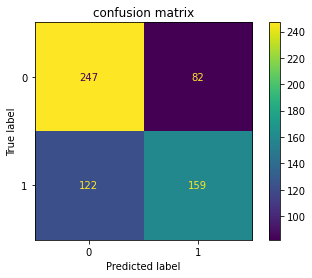

In [1813]:
## Confusion matrix & classification report on the training data
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('confusion matrix');
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



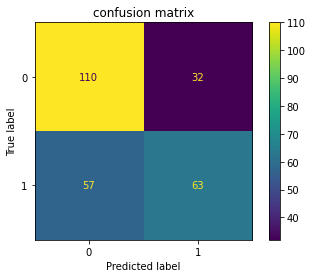

In [1814]:
## Confusion matrix & classification report on the test data
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('confusion matrix');
print(classification_report(y_test, ytest_predict),'\n');

In [1815]:
grid={'penalty':['l2','none','elasticnet','l1'],
      'solver':['lbfgs','liblinear','saga','sag','newton-cg'],
      'tol':[0.0001,0.00001,0.001,0.000001]}

In [1816]:
model3 = LogisticRegression(max_iter=1000 ,n_jobs=2,random_state=1)

In [1817]:
grid_search = GridSearchCV(estimator = model3, param_grid = grid,cv = 4,n_jobs=-1,scoring='f1')

In [1818]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(max_iter=1000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'elasticnet', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'sag',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05, 0.001, 1e-06]},
             scoring='f1')

In [1819]:
best_model = grid_search.best_estimator_

In [1820]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



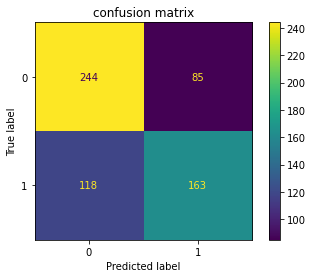

In [1821]:
## Confusion matrix & classification report on the training data
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('confusion matrix');
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



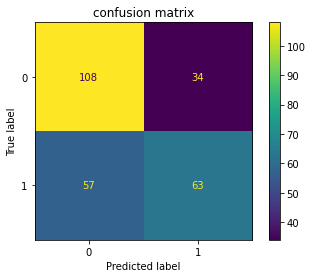

In [1822]:
## Confusion matrix & classification report on the test data
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('confusion matrix');
print(classification_report(y_test, ytest_predict),'\n');

In [1823]:
grid={'penalty':['l1','none','elasticnet'],
    'solver':['liblinear','saga''sag'],
      'tol':[0.0001,0.00001]}

In [1824]:
model4 = LogisticRegression(max_iter=1000 ,n_jobs=2,random_state=1)

In [1825]:
grid_search = GridSearchCV(estimator = model4, param_grid = grid,n_jobs=-1,scoring='f1')

In [1826]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'none', 'elasticnet'],
                         'solver': ['liblinear', 'sagasag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [1827]:
best_model = grid_search.best_estimator_

In [1828]:
# Prediction
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 



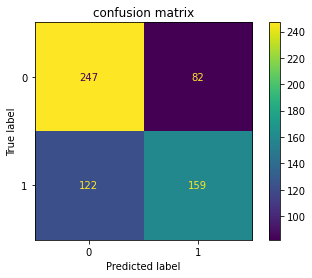

In [1829]:
## Confusion matrix & classification report on on the train data
plot_confusion_matrix(best_model,X_train,y_train)
plt.title('confusion matrix');
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



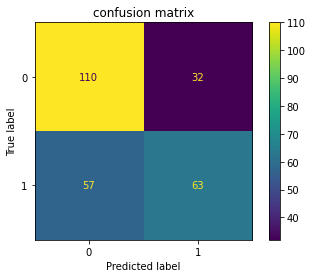

In [1830]:
## Confusion matrix & classification report on the test data
plot_confusion_matrix(best_model,X_test,y_test)
plt.title('confusion matrix');
print(classification_report(y_test, ytest_predict),'\n');

We tried multiple models with different set of parameters by using Gridsearch and not found much improvment but as recall slightly improved in model4 for class 0 so we will go with model4

In [1831]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [1832]:
# Final LR model
model_F = LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1',n_jobs=2,tol=0.0001,random_state=1)
model_F.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear')

In [1833]:
ytrain_predict_F = model_F.predict(X_train)
ytest_predict_F = model_F.predict(X_test)

In [1834]:
model_F.coef_

array([[-1.60772099e-05, -4.91773354e-02,  6.92519913e-02,
        -1.21965216e+00, -7.97142993e-03,  1.25278311e+00]])

## Building linear discriminant(LDA) model

In [1786]:
lda = LinearDiscriminantAnalysis()
model5=lda.fit(X_train,y_train)

#### Prediction

In [1787]:
pred_class_train5 = model5.predict(X_train)
pred_class_test5 = model5.predict(X_test)

In [1788]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train5),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test5),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



We build our model with default parameters and got Accuracy more than 65 now will use different combination of parameters and will see if our model score improve.

In [1789]:
lda = LinearDiscriminantAnalysis(solver='lsqr',priors= [0.5,0.5] )
model7=lda.fit(X_train,y_train)

In [1790]:
pred_class_train = model7.predict(X_train)
pred_class_test = model7.predict(X_test)

In [1791]:
confusion_matrix(y_train,pred_class_train)

array([[226, 103],
       [105, 176]], dtype=int64)

In [1792]:
confusion_matrix(y_test,pred_class_test)

array([[101,  41],
       [ 45,  75]], dtype=int64)

In [1793]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.69      0.68       329
           1       0.63      0.63      0.63       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.71      0.70       142
           1       0.65      0.62      0.64       120

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262
 



In [1794]:
lda = LinearDiscriminantAnalysis(solver= 'eigen',priors= [0.6,0.4] )
model6=lda.fit(X_train,y_train)

In [1795]:
pred_class_train6 = model6.predict(X_train)
pred_class_test6 = model6.predict(X_test)

In [1796]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train6),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test6),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.65      0.82      0.72       329
           1       0.69      0.47      0.56       281

    accuracy                           0.66       610
   macro avg       0.67      0.65      0.64       610
weighted avg       0.67      0.66      0.65       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.82      0.72       142
           1       0.68      0.45      0.54       120

    accuracy                           0.65       262
   macro avg       0.66      0.64      0.63       262
weighted avg       0.66      0.65      0.64       262
 



We tried different parameters and in model7 we got train and test score close to each other also score from train to test is not decreasing.

In [1797]:
model7.coef_

array([[-1.44748476e-05, -5.73218187e-02,  6.09200685e-02,
        -1.28700142e+00, -3.23170095e-02,  1.29994632e+00]])

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### For Logistic Regression Confusion Matrix , Classification Report, AUC and ROC for the training data 

In [1835]:
confusion_matrix(y_train, ytrain_predict_F)

array([[247,  82],
       [122, 159]], dtype=int64)

In [1836]:
print(classification_report(y_train, ytrain_predict_F),'\n');

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 



AUC: 0.715


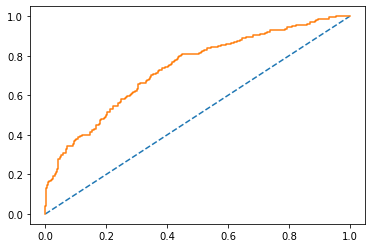

In [1837]:
probs = model_F.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
LR_train_fpr, LR_train_tpr, LR_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_train_fpr, LR_train_tpr)

### For Logistic Regression Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [1839]:
confusion_matrix(y_test, ytest_predict_F)

array([[110,  32],
       [ 57,  63]], dtype=int64)

In [1840]:
print(classification_report(y_test, ytest_predict_F),'\n');

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



AUC: 0.718


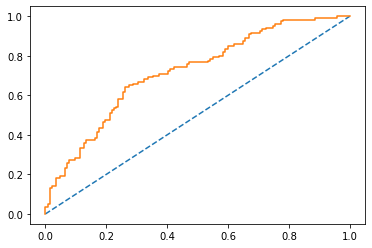

In [1841]:
probs = model_F.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
LR_test_fpr, LR_test_tpr, LR_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_test_fpr, LR_test_tpr)

## LR Conclusion

#### Train Data:

AUC- 72%

Accuracy- 67%

Precision- 65%

f1-Score- 60%

#### test Data:

AUC- 72%

Accuracy- 66%

Precision- 68%

f1-Score- 59%

### For LDA Confusion Matrix , Classification Report, AUC and ROC for the training data

In [1843]:
confusion_matrix(y_train,pred_class_train)

array([[226, 103],
       [105, 176]], dtype=int64)

In [1844]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.69      0.68       329
           1       0.63      0.63      0.63       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



AUC: 0.733


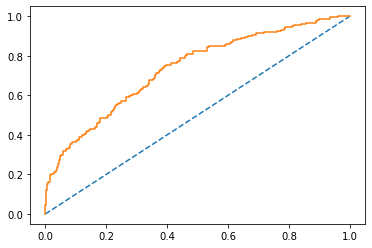

In [1845]:
probs = model7.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)

### For LDA Confusion Matrix , Classification Report, AUC and ROC for the testing data

In [1846]:
confusion_matrix(y_test,pred_class_test)

array([[101,  41],
       [ 45,  75]], dtype=int64)

In [1721]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.71      0.70       142
           1       0.65      0.62      0.64       120

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262
 



AUC: 0.714


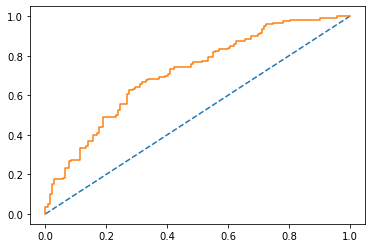

In [1722]:
probs = model7.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)

## LDA Conclusion

#### Train Data:

AUC- 73%

Accuracy- 66%

Precision- 63%

f1-Score- 63%

#### test Data:

AUC- 71%

Accuracy- 67%

Precision- 65%

f1-Score- 64%

## Comparison of the performance metrics from the 2 models

In [1842]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataa = pd.DataFrame({'LR Train':[0.67,0.72,0.57,0.66,0.61],
        'LR Test':[0.66,0.72,0.53,0.66,0.59],
       'LDA Train':[0.66,0.73,0.63,0.63,0.63],
        'LDA Test':[0.67,0.71,0.62,0.65,0.64]},index=index)
round(dataa,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.66,0.66,0.67
AUC,0.72,0.72,0.73,0.71
Recall,0.57,0.53,0.63,0.62
Precision,0.66,0.66,0.63,0.65
F1 Score,0.61,0.59,0.63,0.64


### ROC Curve for the 2 models on the training data

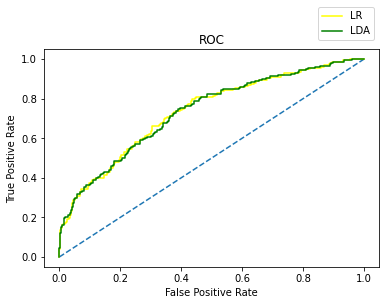

In [1724]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_train_fpr, LR_train_tpr,color='yellow',label="LR")
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 2 models on the testing data

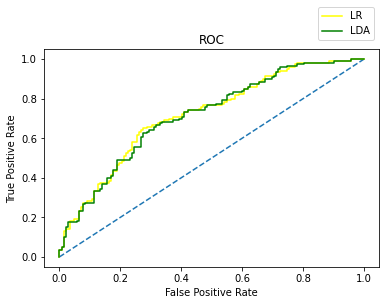

In [1725]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_test_fpr, LR_test_tpr,color='yellow',label="LR")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [1726]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dataa = pd.DataFrame({'LR Train':[0.66,0.72,0.56,0.65,0.60],
        'LR Test':[0.67,0.72,0.53,0.68,0.59],
       'LDA Train':[0.66,0.73,0.63,0.63,0.63],
        'LDA Test':[0.67,0.71,0.62,0.65,0.64]},index=index)
round(dataa,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.66,0.67,0.66,0.67
AUC,0.72,0.72,0.73,0.71
Recall,0.56,0.53,0.63,0.62
Precision,0.65,0.68,0.63,0.65
F1 Score,0.60,0.59,0.63,0.64


Out of the 2 models, LDA has slightly better performance than the Logistic Regression(LR) interms of overall accuracy and difference between train and test score is very minimum in LDA 

#### Co-efficient from LR model.

In [1847]:
model_F.coef_

array([[-1.60772099e-05, -4.91773354e-02,  6.92519913e-02,
        -1.21965216e+00, -7.97142993e-03,  1.25278311e+00]])

#### Co-efficient from LDA model.

In [1848]:
model7.coef_

array([[-1.44748476e-05, -5.73218187e-02,  6.09200685e-02,
        -1.28700142e+00, -3.23170095e-02,  1.29994632e+00]])

As per our model Education and Foreigner is very important features for predeiction and other features also related to dependent variable y but in negative direction.

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Insights: 
    
1. We have seen that LDA is better model with 0.65 precision in test data.


2. we want to reduce FP as we don't want that we predict eomployee will opt but in actual he didnt.


3. We need to go for higher number of education as this is importand variable.


4. 65% of empoyee who did not opted for Holiday Package are correctly predicted .


5. Out of all empoyees who actually didnot opted , 62% of empoyees who didnot opted have been predicted correctly.


6. Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a decent model for classification

## Recommendation:

1. Mostly who opted for Holliday_Package is between salary range 30k to 60k so need to focus on other salary range that why they are not opting for packges.


2. non foreigner less opted for package  so need to provide additional benefit, resources to them. 


3. The number of opted for  Holliday_Package decreases when number of children increases so company should provide attactive packages which has good benefits for childres.


4. Company should focus on age more than 40 and need to check how they can attract them for Holliday_Package


5. Those we have higher salaries not opting for Holliday_Package so need to add some benefits, offers and tour location to attract higher salary employees.


6. Packages provided by company not seems to be in expensive range they can add some luxry/premium packages for higher salary employees.